In [524]:
import numpy as np
from random import *
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import pandas as pd

In [525]:
%matplotlib inline

In [526]:
x_row, y_col, a_action = 10, 15, 4  #a_action = 4  actions up, down, left, right
r_x, r_y = 4, 4 #location of reward
r_pos = [r_x-1, r_y-1] # because of index
n_episodes = 700

In [527]:
def nextstate(s, a):
    if a == 0 and s[0]+1<x_row: #up
        next_state_x = s[0]+1
        next_state_y = s[1]
    elif a == 1 and s[0]-1>=0: # down
        next_state_x = s[0]-1
        next_state_y = s[1]  
    elif a == 2 and s[1]-1>=0: #left if y_col value is x then max index x-1 so less than <y_col
        next_state_x = s[0]
        next_state_y = s[1]-1
    elif a == 3 and s[1]+1<y_col: # right
        next_state_x = s[0]
        next_state_y = s[1]+1
    else:
        # action doesn't change the state so,
        next_state_x = s[0]
        next_state_y = s[1]

    return [next_state_x, next_state_y]
        
    

In [528]:
def maxq(q,s):
    max_qs = -1
    best_action = -1
    row = 0
    col =1
    
    if q[s[row], s[col],0]>max_qs:  # means up action of that state
        max_qs = q[s[row], s[col],0]
        best_action = 0
        
    if q[s[row], s[col],1]>max_qs:  #means down action of that state
        max_qs = q[s[row], s[col],1]
        best_action = 1
        
    if q[s[row], s[col],2]>max_qs: # left action
        max_qs = q[s[row], s[col],2]
        best_action = 2
        
    if q[s[row], s[col],3]>max_qs: # right action
        max_qs = q[s[row], s[col],3]
        best_action = 3
    
    # what to do when all actions have the same value: pick random
    if q[s[row], s[col],0]==q[s[row], s[col],1]==q[s[row], s[col],2]==q[s[row], s[col],3]:
        #print("Random in Best...")
        a = randint(0,3) # choose a random action up down,left,right
        max_qs = q[s[row], s[col], a]
        best_action = a
    return max_qs, best_action

In [529]:
def episode(q,s,e):
    steps = 0
    alpha = 0.5
    gamma = 0.97
    
    while(True):
        steps = steps + 1 # count steps
        #print("Step:", steps)
        
        random_val = random()
        
        if random_val<e:
            #-------Random action------
            #print("Choosing Random...")
            a = randint(0,3) # choose a random action up down,left,right
        else:
            #-------Best action-------
            #print("Choosing best...")
            max_q_s, a = maxq(q,s)
            #print("In state S:", s, "Best Action a:", a, "Value:", max_q_s)
            #---------
        
        next_s = nextstate(s,a)        
        #print("CS:", s,"a:", a, "NS:", next_s)
        
        if(s == next_s):
            #print("state didn\'t change..take another step...")
            continue
            
        if next_s==r_pos:
            r = 1
        else:
            r = 0
        #print("Reward got:", r)
        
        max_q_next_s_a, best_action = maxq(q,next_s)  # ignore the best_action parameter
        #print("max action of next_s:", max_q_next_s_a)
        
        q[s[0],s[1],a]= q[s[0],s[1],a] + alpha *(r + gamma*max_q_next_s_a-q[s[0],s[1],a])
        
        #print("Q-updated:",s[0], s[1],a,"=", q[s[0],s[1],a],"\n")
        
        #update current stat
        s = next_s
        if s == r_pos:# goal point reached
            break
    
    return q, steps

In [530]:
# Q-matrix set to 0
q0 = np.zeros((x_row,y_col,a_action))
q0[0, :,1] = -1 # no down move from x=0 so, set them to 0
q0[x_row-1, :,0] = -1 # no up move from topmost x so, set them to 0
q0[:, 0,2] = -1 # no left move from y=0 so, set them to 0
q0[:, y_col-1 ,3] = -1 # no right move from rightmost y so, set them to 0

list_episodes_q0 = []
each_episode_steps_q0 = []

for i in range(n_episodes):
    print("\n--Episode:", i+1)
    while(True): # initial position
        # choose a random position
        x = randint(0, x_row-1)
        y = randint(0, y_col-1)

        if[x,y]!=r_pos:    
            break # if x,y != reward position then ok break

    #print("initial position:",x,y)        

    e = 0.05
    q0, steps = episode(q0,[x,y],e)

    #print(q)
    print("Total Steps:", steps)
    list_episodes_q0.append(i+1)
    each_episode_steps_q0.append(steps)


--Episode: 1
Total Steps: 489

--Episode: 2
Total Steps: 131

--Episode: 3
Total Steps: 848

--Episode: 4
Total Steps: 24

--Episode: 5
Total Steps: 869

--Episode: 6
Total Steps: 2458

--Episode: 7
Total Steps: 557

--Episode: 8
Total Steps: 422

--Episode: 9
Total Steps: 20

--Episode: 10
Total Steps: 144

--Episode: 11
Total Steps: 793

--Episode: 12
Total Steps: 1338

--Episode: 13
Total Steps: 20

--Episode: 14
Total Steps: 1360

--Episode: 15
Total Steps: 10

--Episode: 16
Total Steps: 16

--Episode: 17
Total Steps: 6

--Episode: 18
Total Steps: 79

--Episode: 19
Total Steps: 6

--Episode: 20
Total Steps: 68

--Episode: 21
Total Steps: 13

--Episode: 22
Total Steps: 278

--Episode: 23
Total Steps: 14

--Episode: 24
Total Steps: 7

--Episode: 25
Total Steps: 7

--Episode: 26
Total Steps: 21

--Episode: 27
Total Steps: 13

--Episode: 28
Total Steps: 29

--Episode: 29
Total Steps: 6

--Episode: 30
Total Steps: 327

--Episode: 31
Total Steps: 20

--Episode: 32
Total Steps: 317

--Ep

--Episode: 450
Total Steps: 3

--Episode: 451
Total Steps: 4

--Episode: 452
Total Steps: 16

--Episode: 453
Total Steps: 13

--Episode: 454
Total Steps: 18

--Episode: 455
Total Steps: 14

--Episode: 456
Total Steps: 6

--Episode: 457
Total Steps: 11

--Episode: 458
Total Steps: 7

--Episode: 459
Total Steps: 6

--Episode: 460
Total Steps: 4

--Episode: 461
Total Steps: 6

--Episode: 462
Total Steps: 8

--Episode: 463
Total Steps: 11

--Episode: 464
Total Steps: 5

--Episode: 465
Total Steps: 15

--Episode: 466
Total Steps: 8

--Episode: 467
Total Steps: 2

--Episode: 468
Total Steps: 9

--Episode: 469
Total Steps: 3

--Episode: 470
Total Steps: 7

--Episode: 471
Total Steps: 8

--Episode: 472
Total Steps: 6

--Episode: 473
Total Steps: 10

--Episode: 474
Total Steps: 7

--Episode: 475
Total Steps: 7

--Episode: 476
Total Steps: 10

--Episode: 477
Total Steps: 6

--Episode: 478
Total Steps: 3

--Episode: 479
Total Steps: 11

--Episode: 480
Total Steps: 8

--Episode: 481
Total Steps: 8

In [531]:
#print("Q set to 0>Episodes:", list_episodes_q0)
#print("Corresponding Steps:", each_episode_steps_q0)

### Optimal Policy

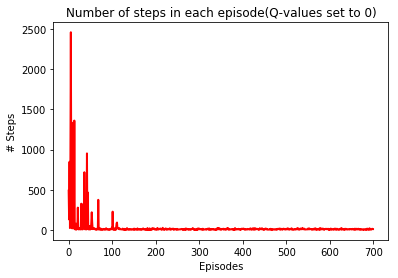

In [532]:
plt.plot(each_episode_steps_q0, "r-", linewidth=2)
plt.xlabel("Episodes")
plt.ylabel("# Steps")
plt.title("Number of steps in each episode(Q-values set to 0)")
plt.legend()

The agent takes around 110 episodes before reaching asymptotic behaviours.

In the given gridworld environment, where only up, down, left, and right actions are possible, an agent can reach from a starting position $s(x, y)$ to the reward position $r(i,j)$ following different paths, but the optimal number of steps needed from $s(x,y)$ to $r(i,j)$ will be the same for any optimal policy. As shown in the following figure, the agent can reach from $s(0,0)$ to $r(2,2)$ following either the green or the red arrow cells. But for any optimal policy the number of steps needed to reach from $s(0,0)$ to $r(2,2)$ will be the same, and it is $4$ in this case.

<img src = "same_step.png">

For the optimal policy, the number of steps needed in our given gridworld enivornment to reach from a state $s(x,y)$ to reward $r(i,j)$ is $|i-x|+|j-y|$. The expected average number of steps needed for the optimal policy:

$expected\_avg\_number\_steps= \frac{\sum\limits_{x} \sum\limits_{y} |i-x|+|j-y|}{x*y}$

So, the expected average number of steps for the above 3x3 gridworld is 

$\frac{|2-0|+|2-0|+|2-0|+|2-1|+|2-0|+|2-2|+|2-1|+|2-0|+|2-1|+|2-1|+|2-1|+|2-2|+|2-2|+|2-0|+|2-2|+|2-1|+|2-2|+|2-2|}{3*3}$

$=\frac{18}{9}$

$=2$

Applying the same formula we calculate the expected average number of steps for the optimal policy of our $10*15$ gridworld. It is given below.

In [548]:
# expected average number of steps needed for the optimal policy
steps_needed = 0
for x in range (x_row):
    for y in range (y_col):
        steps_needed = steps_needed + abs(r_pos[0]-x) + abs(r_pos[1]-y)

expected_avg_steps_needed_optimal = steps_needed/(x_row*y_col)

print("Expected average number of steps needed for the optimal policy:", expected_avg_steps_needed_optimal)

Expected average number of steps needed for the optimal policy: 7.5


In [534]:
# average number of steps needed for the agent
steps_needed = 0
for x in range (x_row):
    for y in range (y_col):
        s = [x,y]
        while(s!=r_pos):
            steps_needed = steps_needed + 1
            _ , best_action = maxq(q0,s)
            next_state = nextstate(s,best_action)
            s = next_state

avg_number_steps_agent = steps_needed/(x_row*y_col)
print("Average number of steps needed by the agent is:" , avg_number_steps_agent)

Average number of steps needed by the agent is: 9.193333333333333


In [547]:
print('Though the average number of steps needed by the agent is not the same as the theoretically expected average number of steps, the difference between them is low. \navg_number_steps_agent - expected_avg_steps_needed_optimal =', avg_number_steps_agent - expected_avg_steps_needed_optimal,'\nThe agent does not reach the average number of steps for the optimal policy because of the low number of training episodes. We have trained the agent only for', n_episodes, 'episodes. This difference will reduce if the number of training episodes is high.') 

Though the average number of steps needed by the agent is not the same as the theoretically expected average number of steps, the difference between them is low. 
avg_number_steps_agent - expected_avg_steps_needed_optimal = 1.6933333333333334 
The agent does not reach the average number of steps for the optimal policy because of the low number of training episodes. We have trained the agent only for 700 episodes. This difference will reduce if the number of training episodes is high.


# Optimistic Initialization

In [536]:
#Q-matrix set to 1
q1 = np.ones((x_row,y_col,a_action))
list_episodes_q1 = [] # for all q values set to 1
each_episode_steps_q1 = []

q1[0, :,1] = -1 # no down move from x=0 so, set them to 0
q1[x_row-1, :,0] = -1 # no up move from topmost x so, set them to 0
q1[:, 0,2] = -1 # no left move from y=0 so, set them to 0
q1[:, y_col-1 ,3] = -1 # no right move from rightmost y so, set them to 0


#n_episodes = 1
for i in range(n_episodes):
    print("\n--Episode:", i+1)
    while(True): # initial position
        # choose a random position
        x = randint(0, x_row-1)
        y = randint(0, y_col-1)

        if[x,y]!=r_pos:    
            break # if x,y != reward position then ok break

    #print("initial position:",x,y)        

    e = 0.05
    q1, steps = episode(q1,[x,y],e)

    #print(q1)
    print("Total Steps:", steps)
    list_episodes_q1.append(i+1)
    each_episode_steps_q1.append(steps)


--Episode: 1
Total Steps: 244

--Episode: 2
Total Steps: 289

--Episode: 3
Total Steps: 85

--Episode: 4
Total Steps: 266

--Episode: 5
Total Steps: 177

--Episode: 6
Total Steps: 97

--Episode: 7
Total Steps: 14

--Episode: 8
Total Steps: 134

--Episode: 9
Total Steps: 105

--Episode: 10
Total Steps: 51

--Episode: 11
Total Steps: 44

--Episode: 12
Total Steps: 6

--Episode: 13
Total Steps: 135

--Episode: 14
Total Steps: 133

--Episode: 15
Total Steps: 106

--Episode: 16
Total Steps: 41

--Episode: 17
Total Steps: 158

--Episode: 18
Total Steps: 11

--Episode: 19
Total Steps: 74

--Episode: 20
Total Steps: 13

--Episode: 21
Total Steps: 3

--Episode: 22
Total Steps: 6

--Episode: 23
Total Steps: 35

--Episode: 24
Total Steps: 99

--Episode: 25
Total Steps: 10

--Episode: 26
Total Steps: 92

--Episode: 27
Total Steps: 2

--Episode: 28
Total Steps: 38

--Episode: 29
Total Steps: 25

--Episode: 30
Total Steps: 6

--Episode: 31
Total Steps: 76

--Episode: 32
Total Steps: 37

--Episode: 


--Episode: 330
Total Steps: 4

--Episode: 331
Total Steps: 14

--Episode: 332
Total Steps: 13

--Episode: 333
Total Steps: 12

--Episode: 334
Total Steps: 15

--Episode: 335
Total Steps: 9

--Episode: 336
Total Steps: 12

--Episode: 337
Total Steps: 3

--Episode: 338
Total Steps: 4

--Episode: 339
Total Steps: 4

--Episode: 340
Total Steps: 8

--Episode: 341
Total Steps: 5

--Episode: 342
Total Steps: 7

--Episode: 343
Total Steps: 4

--Episode: 344
Total Steps: 2

--Episode: 345
Total Steps: 5

--Episode: 346
Total Steps: 4

--Episode: 347
Total Steps: 11

--Episode: 348
Total Steps: 13

--Episode: 349
Total Steps: 9

--Episode: 350
Total Steps: 4

--Episode: 351
Total Steps: 13

--Episode: 352
Total Steps: 15

--Episode: 353
Total Steps: 2

--Episode: 354
Total Steps: 1

--Episode: 355
Total Steps: 2

--Episode: 356
Total Steps: 6

--Episode: 357
Total Steps: 2

--Episode: 358
Total Steps: 7

--Episode: 359
Total Steps: 14

--Episode: 360
Total Steps: 6

--Episode: 361
Total Steps: 

--Episode: 624
Total Steps: 8

--Episode: 625
Total Steps: 4

--Episode: 626
Total Steps: 6

--Episode: 627
Total Steps: 8

--Episode: 628
Total Steps: 4

--Episode: 629
Total Steps: 6

--Episode: 630
Total Steps: 10

--Episode: 631
Total Steps: 6

--Episode: 632
Total Steps: 3

--Episode: 633
Total Steps: 2

--Episode: 634
Total Steps: 6

--Episode: 635
Total Steps: 4

--Episode: 636
Total Steps: 5

--Episode: 637
Total Steps: 17

--Episode: 638
Total Steps: 3

--Episode: 639
Total Steps: 13

--Episode: 640
Total Steps: 12

--Episode: 641
Total Steps: 12

--Episode: 642
Total Steps: 17

--Episode: 643
Total Steps: 7

--Episode: 644
Total Steps: 8

--Episode: 645
Total Steps: 5

--Episode: 646
Total Steps: 8

--Episode: 647
Total Steps: 8

--Episode: 648
Total Steps: 14

--Episode: 649
Total Steps: 4

--Episode: 650
Total Steps: 4

--Episode: 651
Total Steps: 1

--Episode: 652
Total Steps: 18

--Episode: 653
Total Steps: 12

--Episode: 654
Total Steps: 5

--Episode: 655
Total Steps: 15

In [537]:
#print("Q set to 1>Episodes:", list_episodes_q1)
#print("Corresponding Steps:", each_episode_steps_q1)

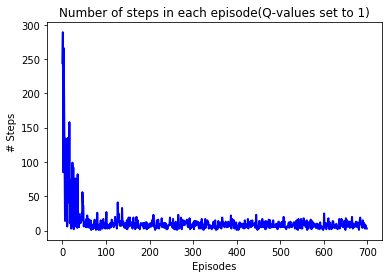

In [538]:
#plt.plot(knn_test_error_rates, "r-+", linewidth=2, label = "KNN")
plt.plot(each_episode_steps_q1, "b-", linewidth=2)
plt.xlabel("Episodes")
plt.ylabel("# Steps")
plt.title("Number of steps in each episode(Q-values set to 1)")
plt.legend()

### Comparison between the two learning curves

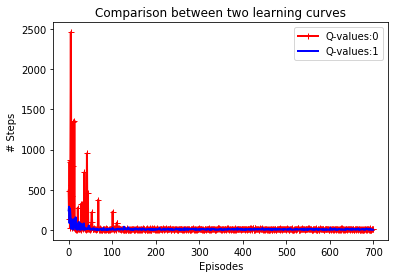

In [539]:
plt.plot(each_episode_steps_q0, "r-+", linewidth=2, label = "Q-values:0")
plt.plot(each_episode_steps_q1, "b-", linewidth=2, label = "Q-values:1")
plt.xlabel("Episodes")
plt.ylabel("# Steps")
plt.title("Comparison between two learning curves")
plt.legend()

When Q-values are set to 1, it encourages exploration.

From the above figure it is clear that the agent learns the optimal policy faster when Q-values are set to 1. As we can see, with Q-values set to 1, the agent shows asymptotic behavior after around 50 episodes. On the other hand, when Q-values are set to 1, around 110 episodes are needed.

Besides, when the Q-values are set to 1, for each episode, the agent requires fewer steps to learn the Q-values to improve the policy. The number of steps needed in each episode is less than 350 when Q-values are set to 1, whereas it takes over 1,000 steps for some episodes when Q-values are set to 0.

# Plotting Q

#### Plotting Q (the Q values were initialized to 0)

In [557]:
max_q0 = q0.max(axis =2)
#print(max_q0)

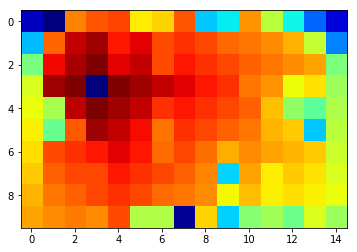

In [558]:
plt.imshow(max_q0, cmap = 'jet')

In [559]:
best_directions =[]
for s_x in range (x_row):
    for s_y in range (y_col):
        if [s_x,s_y]==r_pos:
            best_directions.append('(G)')
        else:
            max_q_val, best_direction = maxq(q0,[s_x,s_y])
            if best_direction == 0:
                best_directions.append('U')
            elif best_direction == 1:
                best_directions.append('D')
            elif best_direction == 2:
                best_directions.append('L')
            elif best_direction == 3:
                best_directions.append('R')
                
#print(best_directions) 
#best_dir = np.array(best_directions).reshape((x_row,y_col))
#print(best_dir)
best_dir_data_frame = pd.DataFrame(np.array(best_directions).reshape((x_row,y_col)))
print(best_dir_data_frame)

  0  1  2    3  4  5  6  7  8  9  10 11 12 13 14
0  U  U  U    U  U  U  U  U  U  U  U  U  U  U  U
1  U  R  R    U  U  U  R  U  U  L  U  U  U  U  U
2  U  U  U    U  R  U  R  U  U  U  L  L  L  L  U
3  U  R  R  (G)  L  L  L  L  L  L  D  L  L  D  U
4  U  R  D    D  L  L  R  D  L  L  L  L  U  R  U
5  U  L  U    D  D  L  D  D  D  D  L  U  L  U  U
6  U  R  R    R  D  L  U  D  D  R  D  L  L  L  U
7  U  R  D    R  D  D  L  D  L  D  D  R  D  L  U
8  U  D  D    R  D  L  L  D  L  L  D  R  D  L  L
9  R  D  D    D  D  D  D  D  D  D  D  D  D  D  D


#### Plotting Q (the Q-values were initialized to 1)

In [560]:
max_q1 = q1.max(axis = 2)

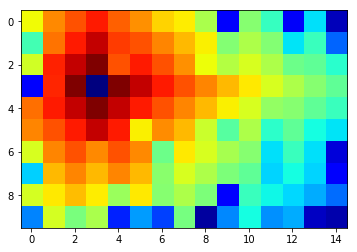

In [561]:
plt.imshow(max_q1, cmap = 'jet')

In [562]:
# Directions for optimistic q
best_directions =[]
for s_x in range (x_row):
    for s_y in range (y_col):
        if [s_x,s_y]==r_pos:
            best_directions.append('(G)')
        else:
            max_q_val, best_direction = maxq(q1,[s_x,s_y])
            if best_direction == 0:
                best_directions.append('U')
            elif best_direction == 1:
                best_directions.append('D')
            elif best_direction == 2:
                best_directions.append('L')
            elif best_direction == 3:
                best_directions.append('R')
                
#print(best_directions) 
best_dir_data_frame = pd.DataFrame(np.array(best_directions).reshape((x_row,y_col)))
print(best_dir_data_frame)

  0  1  2    3  4  5  6  7  8  9  10 11 12 13 14
0  R  R  R    U  L  U  U  U  L  L  U  L  L  U  L
1  R  R  U    U  L  U  L  L  L  R  U  L  R  U  U
2  R  R  R    U  R  U  L  U  U  U  U  L  L  U  U
3  U  R  R  (G)  L  L  L  L  L  L  L  L  L  L  L
4  R  R  R    D  L  L  D  D  L  L  D  D  D  D  L
5  R  R  D    D  D  L  D  D  L  R  D  R  D  L  D
6  D  D  D    L  D  L  L  D  L  L  D  R  D  L  D
7  U  D  D    L  D  L  R  D  L  L  D  L  D  L  L
8  R  D  D    D  R  D  L  D  L  D  D  L  D  L  L
9  D  D  D    D  D  D  D  D  D  R  D  L  D  L  D
